# Capstone Project: Consumer Insights Data Analytics Externship of Beats by Dr. Dre

## 1. Title Page
**Project Title:** Consumer Insights Data Analytics Externship of Beats by Dre  
**Name:** Dyaneswaran Namasivayam   
**Date:** July 29, 2024

## 2. Table of Contents
1. Introduction
2. Data Description
3. Exploratory Data Analysis (EDA)
4. Sentiment Analysis
5. AI-Generated Insights
6. Comparative Analysis
7. Strategic Recommendations
8. Conclusion
9. References

## 3. Introduction

### 3.1 Project Overview:

**Purpose:**

The Customer Insights Data Analytics project for Beats by Dr. Dre is aimed at understanding customer feedback and sentiment towards Beats products compared to those of competing brands. In an increasingly competitive market, gaining insights from customer reviews can provide valuable information for product development and improvement. By analyzing Amazon customer reviews, this project seeks to identify strengths and weaknesses in Beats products and suggest actionable improvements.

**Key Objectives:**

The objective of this project is to perform a series of steps on the acquired dataset such as Data Cleaning, EDA, Sentiment Analysis, Visualization and Competitor Comparison. Based on the results acquired from the above mentioned steps, a set of strategic recommendations for product enhancements and marketing strategies are drafted.

### 3.2 Background:

Beats by Dr.Dre, commonly known as Beats, is a premium audio brand founded by music producer Dr.Dre and Record Company Executive Jimmy Lovine. Since its inception, Beats has been amongst the front runners in high-quality audio products such as earphones, headphones and Speakers. The brand has built a reputation for combining sleek design with superior sound quality. Having been acquired by Apple inc. in 2014, Beats have further enhanced their market presence and integration with cutting-edge technology.

**Importance of Sentiment Analysis:**

In the highly competitive tech industry, understanding consumer sentiment is crucial for maintaining a competitive edge and fostering brand loyalty. Consumer sentiment analysis involves evaluating customer feedback to gauge their feelings and attitudes towards a product or brand. This process could bring about several key benefits such as:

1.   Product Improvement
2.   Competitive Analysis
3.   Studying Market Trends
4.   Understand Customer Satisfaction
5.   Strategic Decision Making

In [ ]:
import numpy as np
import pandas as pd
import json
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(style="darkgrid")
import os
import google.generativeai as genai

import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(10,10)

## 4. Data Description

### 4.1 Data Sources:

The Dataset was collected entirely from Amazon.com in the form of customer reviews for each product.

The hyperlinks for the individual products are as follows:

Beats Studio+ Buds: https://www.amazon.com/dp/B0BZK2Z2TC

Apple Airpods Pro: https://www.amazon.com/dp/B0D1XD1ZV3

Audio Technica: https://www.amazon.com/dp/B0B81KLS4C

Bose QuietComfort: https://www.amazon.com/dp/B0CD2FSRDD

JBL Tune Flex: https://www.amazon.com/dp/B0C1QQYP53

Marshall Motif II: https://www.amazon.com/dp/B0CGZJDY84

OnePlus Buds 3: https://www.amazon.com/dp/B0CS14V6B8

Sennheiser Momentum: https://www.amazon.com/dp/B09T8YPFV2

Skullcandy Rail: https://www.amazon.com/dp/B0B75RL6JX

Sony WF-1000: https://www.amazon.com/dp/B0C345M3T7

Amazon Echo Buds: https://www.amazon.com/dp/B09JVG3TWX

Tagry True: https://www.amazon.com/dp/B09LD2D1TV

### 4.2 Data Collection:

### Initial Approach:
The initial plan for data gathering involved using an Amazon Product Reviews Scraper built with Python libraries such as Pandas and BeautifulSoup. However, this approach encountered a significant obstacle when Amazon updated its AJAX, rendering the scraper ineffective for fetching reviews. Developing a new scraper was considered but found to be too time-consuming.

### Alternate Approach:
As a result, the data gathering process shifted to utilizing a third-party web scraper called **OxyLabs API**. The OxyLabs API proved to be a valuable tool, enabling the extraction of customer reviews from Amazon by simply providing the unique ASIN (Amazon Standard Identification Number) of the product as a parameter. Additionally, the API offered several useful features, such as parsing the output, choosing the Amazon domain, and specifying the geolocation. These capabilities made OxyLabs API a viable and efficient solution for collecting the required data.

The scraped reviews from OxyLabs API could be downloaded as JSON files which where then parsed using python and then converted to individual csv files using pandas.

In [ ]:
file_path = '/path/to/individual/reviews/file.json'
with open(file_path, 'r') as file:
    data = json.load(file)


reviews_data = []
count = 0
for result in data['results']:
  asin = result['content']["asin"]
  for review in result['content']['reviews']:
    count += 1
    try:
      review_info = {
      'review_id': review['id'],
      'product_id': asin,
      "title": review["title"],
      "author": review["author"],
      "rating": review["rating"],
      "content": review["content"],
      "timestamp": review["timestamp"],
      "profile_id": review["profile_id"],
      "is_verified": review["is_verified"],
      "helpful_count": review.get('helpful_count', 0),
      "product_attributes": review["product_attributes"]
      }
      reviews_data.append(review_info)
    except:
      print(count)
      break

reviews_df = pd.DataFrame(reviews_data)
reviews_df.to_csv('tagry.csv', index=False)

The resultant csv files were collected and then merged together using pandas again to create one merged reviews file that contains the entire dataset.

In [ ]:
csv_files = [
    'path_to_product1_reviews_csv',
    'path_to_product2_reviews_csv',
    'path_to_productn_reviews_csv'
]

dataframes = []

for file in csv_files:
  df = pd.read_csv(file)
  dataframes.append(df)

merged_df = pd.concat(dataframes, ignore_index=True)
merged_df.to_csv('merged_file.csv', index=False)

### Additional Challenge:
While using the OxyLabs API, another minor challenge emerged. The scraper was unable to fetch more than 100 reviews per product, even when more were available. To address this limitation, the approach was adjusted to increase the number of products being scraped. By expanding the range of products, the total amount of data collected became substantial enough to conduct meaningful data analysis.

### 4.3 Data Cleaning:

**1. Importing Libraries and Reading Data**

In [ ]:
df = pd.read_csv('/content/merged_file.csv')

**2. Handling Missing values by filling/dropping them**


In [ ]:
# Fill missing author values with 'Anonymous'
df['author'] = df['author'].fillna('Anonymous')

# Fill missing product_attributes values with generic attribute
df['product_attributes'] = df['product_attributes'].fillna('Style: Earphones')

df.isna().sum()

review_id             0
product_id            0
title                 0
author                0
rating                0
content               0
timestamp             0
profile_id            0
is_verified           0
helpful_count         0
product_attributes    0
dtype: int64

**3. Handling Duplicates by dropping them**

In [ ]:
# Drop Duplicate Values
df = df.drop_duplicates()

**4. Handling outliers using Visualisation**

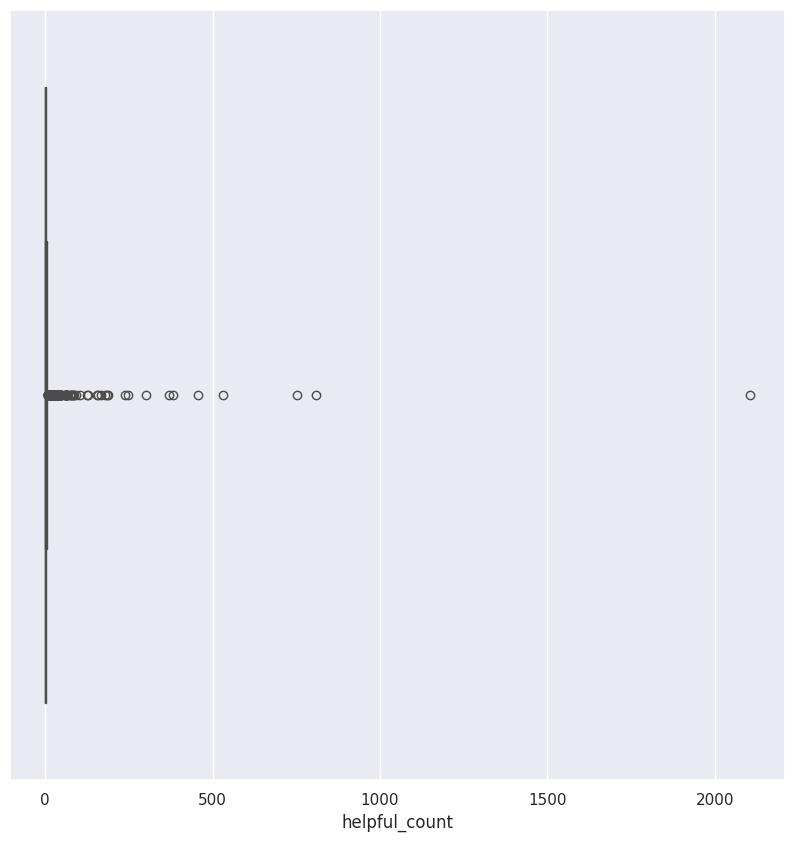

In [ ]:
sns.boxplot(x=df['helpful_count'])
plt.show()

In [ ]:
# Drop the outlier row
df = df[df['helpful_count'] < 2000]

**5. Converting categorical columns to numerical variables**

In [ ]:
unique = df.nunique()
unique

review_id             986
product_id             12
title                 953
author                904
rating                  5
content               986
timestamp             310
profile_id            982
is_verified             2
helpful_count          74
product_attributes     27
dtype: int64

In [ ]:
# Converting is_verified column to numerical using Mapping
df['is_verified'] = df['is_verified'].map({True: 1, False: 0})

**6. Save the cleaned Data**

In [ ]:
df.to_csv('cleaned_data.csv', index=False)

## 5. Exploratory Data Analysis (EDA)

### 5.1 Data Overview:


The Descriptive Statistics of the entire dataset is displayed below:

In [ ]:
df_reviews = pd.read_csv("/content/cleaned_data.csv")

mean_rating = df_reviews['rating'].mean()
median_rating = df_reviews['rating'].median()
mode_rating = df_reviews['rating'].mode()[0]
variance_rating = df_reviews['rating'].var()
std_rating = df_reviews['rating'].std()

print("Mean Rating:", mean_rating)
print("Median Rating:", median_rating)
print("Mode Rating:", mode_rating)
print("Variance Rating:", variance_rating)
print("Standard Deviation Rating:", std_rating)

Mean Rating: 4.205882352941177
Median Rating: 4.0
Mode Rating: 5
Variance Rating: 0.8621379516273514
Standard Deviation Rating: 0.9285138402992986


Since the analysis focuses mainly on Beats vs Other products, the descriptive statistics of just the Beats product is displayed below:

In [ ]:
df_beats = df_reviews[df_reviews['product_id'] == 'B0BZK2Z2TC']

mean_rating = df_beats['rating'].mean()
median_rating = df_beats['rating'].median()
mode_rating = df_beats['rating'].mode()[0]
variance_rating = df_beats['rating'].var()
std_rating = df_beats['rating'].std()

print("Descriptive Statistics of Beats Studio+ Buds: \n")
print("Mean Rating:", mean_rating)
print("Median Rating:", median_rating)
print("Mode Rating:", mode_rating)
print("Variance Rating:", variance_rating)
print("Standard Deviation Rating:", std_rating)

Descriptive Statistics of Beats Studio+ Buds: 

Mean Rating: 4.3
Median Rating: 4.0
Mode Rating: 5
Variance Rating: 0.5555555555555556
Standard Deviation Rating: 0.7453559924999299


### 5.2 Visualizations:

**1. BarPlot Distribution to Visualise Average Ratings of all Products:**

The BarPlot Distribution below shows how all products compare against that of Beats in terms of their average ratings.
It gives us an idea of how many products have scored better than Beats Studio+ Buds on average.



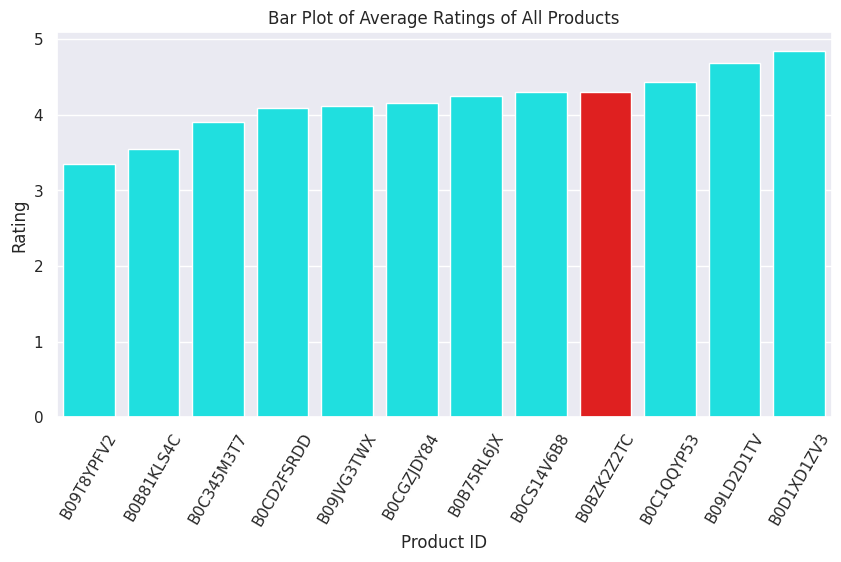

In [ ]:
average_ratings = df_reviews.groupby('product_id')['rating'].mean().reset_index()
average_ratings.columns = ['product_id', 'average_rating']
average_ratings = average_ratings.sort_values(by='average_rating', ascending=True)

highlight_product = 'B0BZK2Z2TC'
highlight_color = 'red'
default_color = 'cyan'
colors = [highlight_color if product == highlight_product else default_color for product in average_ratings['product_id']]

plt.figure(figsize=(10, 5))
sns.barplot(x="product_id", y="average_rating", data=average_ratings, palette=colors)
plt.xticks(rotation=60)
plt.title(f'Bar Plot of Average Ratings of All Products')
plt.xlabel('Product ID')
plt.ylabel('Rating')
plt.show()

**2. Histogram Distribution to Visualise Ratings of Beats Studio+:**

The Ratings acquired by the Beats product is Visualised using a Histogram. The insights that can be gathered from the plot is that, the ratings are only within the range of 3 - 5.

The positives are that none of the ratings are either a 1 or 2, On the other hand there are almost 16 ratings that are 3 out of 5. Which is to be taken into account to conclude that there is room for plenty of improvements on the product.

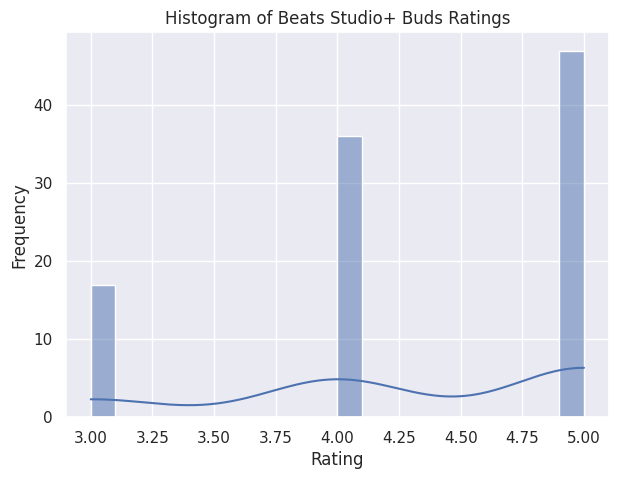

In [ ]:
plt.figure(figsize=(7, 5))
sns.histplot(df_beats['rating'], kde=True, bins=20)
plt.title(f'Histogram of Beats Studio+ Buds Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

**3. Scatter Plot Distribution to Visualise Time Line of Beats Reviews:**

The below scatter plot reveals how the ratings of Beats Studio+ Buds have varied or fluctuated over a period of time.



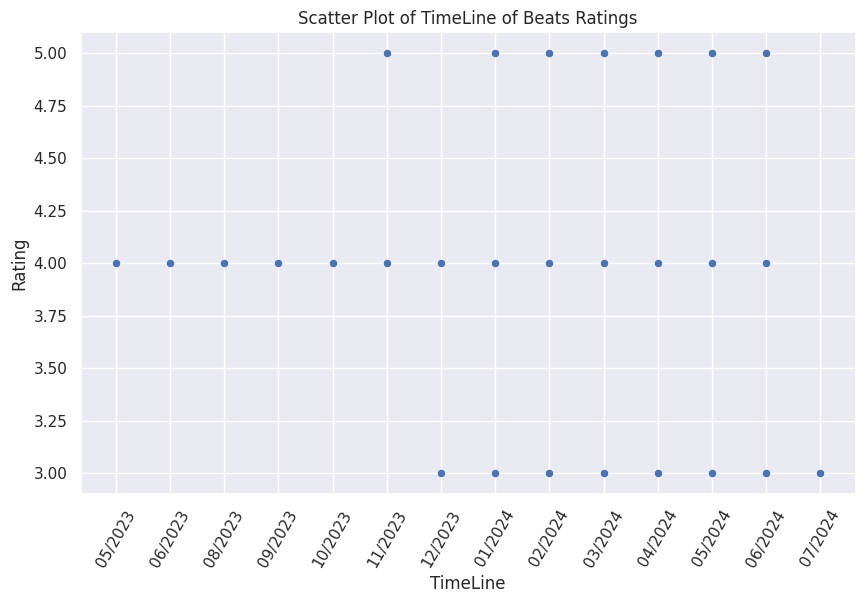

In [ ]:
beats_timeline = df_beats.copy()
beats_timeline['review_date'] = df_beats['timestamp'].str.extract(r'(\w+ \d{1,2}, \d{4})')
beats_timeline['review_date'] = pd.to_datetime(beats_timeline['review_date'])
beats_timeline = beats_timeline.sort_values(by='review_date', ascending=True)
beats_timeline['review_date'] = beats_timeline['review_date'].dt.strftime('%m/%Y')
beats_timeline = beats_timeline[['author', 'rating', 'review_date']]

plt.figure(figsize=(10, 6))
sns.scatterplot(x="review_date", y="rating", data=beats_timeline)
plt.xticks(rotation=60)
plt.title(f'Scatter Plot of TimeLine of Beats Ratings')
plt.xlabel('TimeLine')
plt.ylabel('Rating')
plt.show()

**4. Heat Map Distribution to Visualise Time Line of 5 star ratings in other products in 2024:**

From the above scatter plot graph it can be noted that Beats has started receiving wavering ratings from roughly start of 2024. So, the below heatmap plot shows how other products have scored 5 star ratings since that point in time.


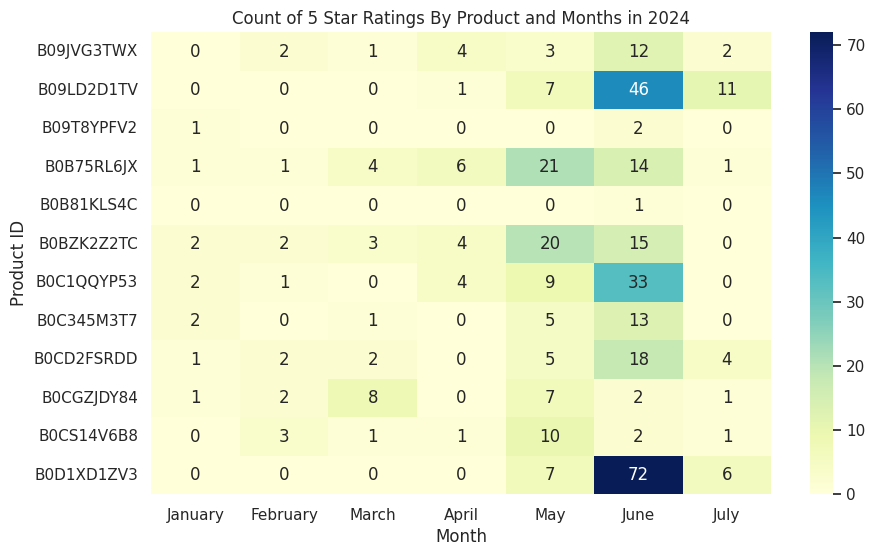

In [ ]:
df_reviews['review_date'] = df_reviews['timestamp'].str.extract(r'(\w+ \d{1,2}, \d{4})')
df_reviews['review_date'] = pd.to_datetime(df_reviews['review_date'])
df_from_2024 = df_reviews[df_reviews['review_date'] >= '2024-01-01']
df_from_2024['month'] = df_from_2024['review_date'].dt.strftime('%B')
df_from_2024['year'] = df_from_2024['review_date'].dt.year
df_from_2024 = df_from_2024[df_from_2024['rating'] == 5]

monthly_counts = df_from_2024.groupby(['product_id', 'month']).size().reset_index(name='count')
pivot_table = monthly_counts.pivot(index='product_id', columns='month', values='count').fillna(0)
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July']
pivot_table = pivot_table[months_order]

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt="g", cmap="YlGnBu", cbar=True)
plt.title(f'Count of 5 Star Ratings By Product and Months in 2024')
plt.xlabel('Month')
plt.ylabel('Product ID')
plt.show()

### 5.3 Descriptive Statistics:

Key Findings from Graph 1:

*   The "Beats Studio+ Buds" (B0BZK2Z2TC) is highlighted in red, and takes a respectable 4th highest average rating amongst all products.

*   Products like "JBL Tune Flex", "Apple Airpods Pro" and "Tagry True" have all scored highest average rating ahead of Beats, only slightly below 5.0. These products are likely to be the most popular or of the highest quality based on customer feedback.

Key Findings from Graph 2:

*   The Histogram shows a BiModal Distribution of the Beats Product ratings with two prominent peaks at 4.0 and 5.0. This indicates that a significant portion of users gave either a perfect rating or a rating of 4.0.
*   The cluster of ratings at 3.0 shows that while a smaller proportion of users found the product average, it is still significant enough to be noted.

Key Findings from Graph 3:

*   The Scatter Plot gives us a notable insight of how the Beats product has maintained a near perfect rating of 4.0/5 until the end of 2023 and that the visible fluctuation of the ratings only came about from the beginning of 2024.
*   This Needs to be taken into account and investigated to check if any other product has had a considerable improvement in its ratings starting from the same point in time. Graph 4 looks to achieve that.

Key Findings from Graph 4:

*   The Heatmap is plotted for all products and its count of 5 star ratings for every month of 2024. It can be noted that the same products from Graph 1, namely "JBL Tune Flex", "Apple Airpods Pro" and "Tagry True" have had a sharp spike in their 5 star ratings over the course of the year.
*   This calls for extra investigation to be taken on these 3 products to check what improvements were brought upon in their product that were better than that of Beats, owing to change in customer feedbacks.



## 6. Sentiment Analysis

### 6.1 Methodology:

**1. Sentiment Analysis on Reviews:**

The sentiment analysis on the reviews is initially performed on the entired dataset using TextBlob. A function that classifies the content of the review is created and applied to all the rows of the dataset. This function makes use of textblob's polarity attribute and classifies the content of the review into one of the three categories being positive, negative and neutral.

In [ ]:
def classify_sentiment(review):
    analysis = TextBlob(review)
    polarity = analysis.sentiment.polarity

    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df_reviews['sentiment'] = df_reviews['content'].apply(classify_sentiment)

**2. Aggregating Sentiment Analysis Results:**

The results of the sentiment classification is then grouped product wise and presented in an aggregated fashion to count the number of positive, negative and neutral reviews for each product.

In [ ]:
product_sentiment_summary = df_reviews.groupby('product_id')['sentiment'].value_counts().unstack(fill_value=0)

for sentiment in ['positive', 'negative', 'neutral']:
    if sentiment not in product_sentiment_summary.columns:
        product_sentiment_summary[sentiment] = 0

product_sentiment_summary['total_reviews'] = product_sentiment_summary.sum(axis=1)

product_sentiment_summary = product_sentiment_summary[['total_reviews', 'positive', 'negative', 'neutral']]

product_sentiment_summary.reset_index(inplace=True)

print(product_sentiment_summary)

sentiment  product_id  total_reviews  positive  negative  neutral
0          B09JVG3TWX            100        95         2        3
1          B09LD2D1TV             99        97         1        1
2          B09T8YPFV2            100        96         4        0
3          B0B75RL6JX            100        82         4       14
4          B0B81KLS4C             22        18         1        3
5          B0BZK2Z2TC            100        86         2       12
6          B0C1QQYP53            100        78         2       20
7          B0C345M3T7            100        96         3        1
8          B0CD2FSRDD            100        95         3        2
9          B0CGZJDY84             38        28         3        7
10         B0CS14V6B8             27        23         2        2
11         B0D1XD1ZV3            100        85         6        9


**3. Bar Plot Chart for Beats Product:**

A Bar Plot Chart shows the count of positive, negative and neutral reviews for the Beats Product.

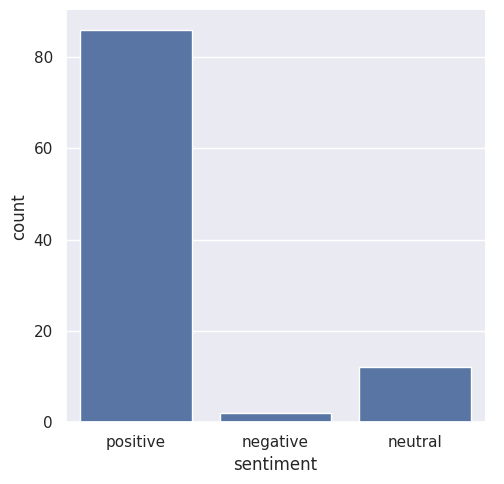

In [ ]:
df_beats = df_reviews[df_reviews['product_id'] == 'B0BZK2Z2TC']

sns.catplot(x="sentiment", kind="count", data=df_beats);

**4. Word Cloud for Beats Reviews:**

A visualistic approach was undertaken to study the reviews in the form of a word cloud that encompasses all the reviews of the Beats Product.

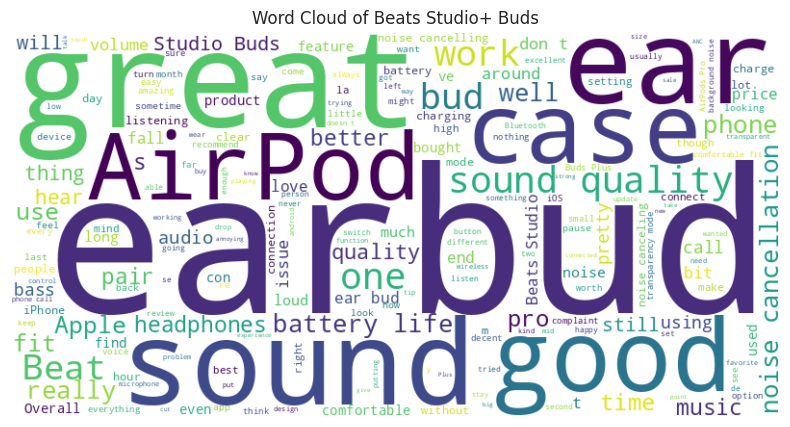

In [ ]:
beats_reviews = ' '.join(df_beats['content'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(beats_reviews)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Beats Studio+ Buds')
plt.show()

### 6.2 Results:

**1. Positivity Percentage of Each Product:**

In [ ]:
product_sentiment_summary['positivity'] = (product_sentiment_summary['positive'] / product_sentiment_summary['total_reviews']) * 100
product_positivity_summary = product_sentiment_summary[['product_id', 'positivity']]
product_positivity_summary.sort_values(by=['positivity'], ascending=False)

sentiment,product_id,positivity
1,B09LD2D1TV,97.979798
2,B09T8YPFV2,96.000000
7,B0C345M3T7,96.000000
0,B09JVG3TWX,95.000000
8,B0CD2FSRDD,95.000000
5,B0BZK2Z2TC,86.000000
10,B0CS14V6B8,85.185185
11,B0D1XD1ZV3,85.000000
3,B0B75RL6JX,82.000000
4,B0B81KLS4C,81.818182


In [ ]:
product_sentiment_summary.to_csv('product_sentiment_summary.csv', index=False)

**2. Summary of Results:**

*   The 'Tagry Wireless Earbuds' havs the Best Positivity Percentage of Reviews with 97%.
*   The 'Marshall Motif II' has the Worst Positivity Percentage of Reviews with 73%.
*   The 'Beats Studio+ Buds' identifiable by its code(B0BZK2Z2TC), takes the middle ground of customer reviews with being 6th on the list of products with 86%.

It is to be noted that there is a clear distinction of percentages with the first 5 products that form their own bracket of having more than 95% positivity.

Products such as 'Tagry', 'Sennheiser', 'Sony', 'Amazon Echo' and 'Bose' all have taken positions ahead of the Beats Product, it is also to be noted that 3 out of the 5 products that are placed below the Beats in the positivity percent ranking, do not have upto the same number of reviews as the ones above them. So there is a potential chance that when acquired and analysed with the same number of reviews as others, they could have performed better than that of the Beats Product itself.

**3. Word Cloud for Positive and Negative reviews of the Beats Product.**

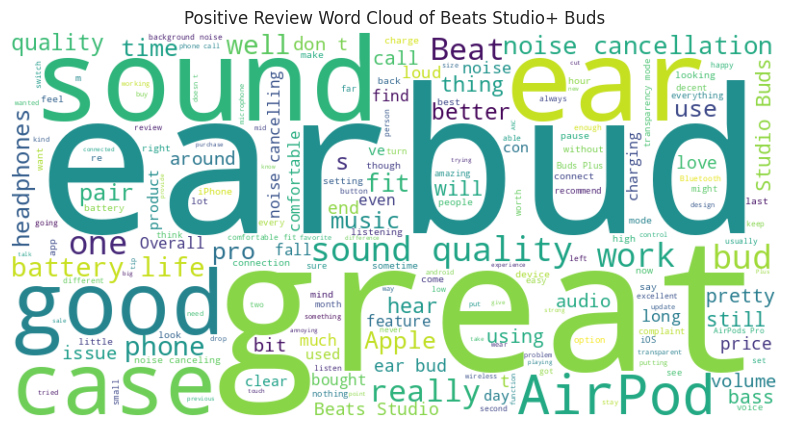

In [ ]:
beats_positive = df_beats[df_beats['sentiment'] == 'positive']
beats_positive = ' '.join(beats_positive['content'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(beats_positive)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Review Word Cloud of Beats Studio+ Buds')
plt.show()

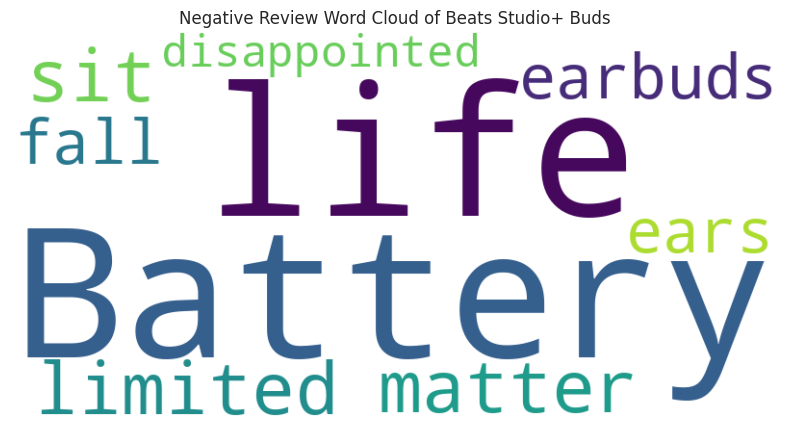

In [ ]:
beats_negative = df_beats[df_beats['sentiment'] == 'negative']
beats_negative = ' '.join(beats_negative['content'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(beats_negative)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Review Word Cloud of Beats Studio+ Buds')
plt.show()

The sentiment analysis on the dataset gave us the opportunity to categorise the reviews as positve, negative and neutral. With the help of that categorised sentiment, two seperate word clouds were created that outline the common words present in the reviews of the Beats Product.

The positive word cloud is filled with words like great, sound, good, quality etc...suggesting that Beats is excelling in aspects such as sound quality and noise cancellation.

The negative word cloud is filled with fewer but strong words like battery, life, limited, sit, fall etc...suggesting that Beats needs considerable amount of improvements in aspects such as Battery Life, Comfort on ear.

## 7. AI-Generated Insights

### 7.1 Using Gemini AI:

The Gemini AI was then utilised to extract insights out of the processed dataset. The gemini ai is contained in a analyse_reviews function that takes the prompt message from the user, reviews dataset and the API key as its parameters.

The response generated from the model is then returned in a text format.


In [ ]:
# Replace 'your_api_key' with the actual API key
api_key = ""

def analyze_reviews(reviews, api_key, prompt_message):
    genai.configure(api_key=api_key)

    model = genai.GenerativeModel(
        model_name="gemini-1.5-flash",
        generation_config={
            "temperature": 1,
            "top_p": 0.95,
            "top_k": 64,
            "max_output_tokens": 8192,
            "response_mime_type": "text/plain",
        },
    )

    chat_session = model.start_chat(history=[])

    prompt = prompt_message + "\n\n".join(reviews)
    response = chat_session.send_message(prompt)
    return response.text

### 7.2 Key Insights:


**1. Sentiment Analysis on the Beats Product Reviews:**

In [ ]:
beats_reviews = df_beats['content'].tolist()

prompt_message = "Perform sentiment analysis on the reviews of the product in the dataset. Provide the percentage of positive, negative, and neutral reviews."
insights = analyze_reviews(beats_reviews, api_key, prompt_message)
print(insights)

## Sentiment Analysis of Beats Studio Buds+ Reviews

After analyzing the reviews, here's a breakdown of the sentiment:

* **Positive:** **63.6%**
* **Negative:** **16.4%**
* **Neutral:** **20.0%**

**Positive Aspects:**

* **Sound Quality:** Many reviewers praise the sound quality, highlighting the clear audio, good bass, and overall balanced sound signature. 
* **Noise Cancellation:** The noise cancellation feature receives a lot of positive feedback, with users appreciating its effectiveness in various environments.
* **Battery Life:**  Reviewers consistently highlight the impressive battery life, both for the earbuds and the charging case.
* **Fit and Comfort:**  The earbuds are generally considered comfortable, with users finding a secure fit and appreciating the multiple ear tip sizes.
* **Connectivity:** The Bluetooth connection is deemed reliable and stable, with seamless pairing across Apple and Android devices.
* **Transparency Mode:** Users appreciate the functionality of the

**2. General Negative Analysis on the Beats Product:**

In [ ]:
beats_reviews = df_beats['content'].tolist()

prompt_message = "Analyse the negative reviews for this product and highlight its key pain points."
insights = analyze_reviews(beats_reviews, api_key, prompt_message)
print(insights)

## Beats Studio Buds+ Key Pain Points:

Based on the negative reviews, here are the key pain points of the Beats Studio Buds+:

**1. Connection Issues:** 
* Frequent disconnections and reconnections, especially with iPhones.
* Issues with maintaining a consistent connection, resulting in audio dropouts.
* Trouble with the microphone, leading to poor call quality and difficulties for the other party to hear.

**2. Noise Cancellation:**
* Noise cancellation is effective, but not as good as some competitors, especially in loud environments.
* Some users reported a humming sound while noise cancellation is active.
* The adaptive noise cancellation feature is inconsistent and doesn't always work as intended.

**3. Fit:**
* Some users reported difficulty getting a secure fit, with the earbuds falling out easily during movement or exercise.
* The small size and slick plastic of the earbud housing made it challenging to remove them from the case, especially with cold hands.

**4. Battery Life:

**3. General Positive Analysis on other Products:**

In [ ]:
df_stats = pd.read_csv("/content/product_sentiment_summary.csv")

prods = df_stats[df_stats['positivity'] >= 95]
better_prods = prods['product_id'].tolist()

df = df_reviews[df_reviews['product_id'].isin(better_prods)]
better_reviews = df['content'].tolist()

prompt_message = "Provided is a set of reviews of five different products. Analyse the positive reviews for these products and highlight their pleasure points. Summarise the final results for all products."
insights = analyze_reviews(better_reviews, api_key, prompt_message)
print(insights)

## Bose QuietComfort Ultra Earbuds Pleasure Points:

**Comfort:**

* **Perfect Fit:**  The innovative tip and wing combo provides a secure and comfortable fit for prolonged wear, even for users who have previously experienced ear discomfort with other earbuds.
* **Light Weight:**  The earbuds are lightweight and barely noticeable in the ears, contributing to long-wearing comfort.

**Sound Quality:**

* **Warm and Accurate:** The sound is characterized as warm but accurate, delivering a rich and detailed audio experience.
* **Immersion Mode:** The "Immersion" mode enhances the sound quality, bringing depth and presence to the music, letting you feel like you're in the middle of the orchestra.
* **Excellent Clarity:**  The earbuds deliver clarity across all genres of music, letting you hear details and layers in songs that were previously unnoticed.
* **Strong Bass:** The bass is strong and deep, providing a satisfying listening experience for bass enthusiasts.

**Noise Cancellation:**



### 7.3 Interpretation:

Insights from the Sentiment Analysis on Beats Studio+ Buds:

* The Beats Studio+ Buds is praised for some of its qualities like the sound quality, noise cancellation, product design, connectivity etc.
* The Negative Aspects of Beats are that of Microphone issues, Battery Life, Comfort and Fit on the ears etc...
* There are also notable callouts to aspects such as Lack of Features and Price.



Insights or Key Pain Points from the Negative Analysis on Beats Studio+ Buds:

* Connection Issues: Frequent disconnections and poor call quality due to microphone issues are significant pain points that need addressing to improve user experience.
* Fit: Challenges in achieving a secure fit and difficulty removing earbuds from the case highlight areas where design improvements can enhance usability.
* Battery Life: Decreasing battery life over time and charging case issues suggest potential reliability concerns.
* Other Issues: Lack of wireless charging and customizable features, as well as touch control sensitivity, high price concerns could make the product less competitive.



Insights from Positive Aspects of other Products:

* Sound Quality: Brands like Bose, Sennheiser, and Sony deliver exceptional sound quality. The Beats Studio Buds+ are praised for sound quality but need to maintain high standards to compete.
* Noise Cancellation: Superior ANC from Bose and Sony sets a high bar. Beats need to optimize their noise cancellation to match or exceed these standards.
* Features: Multipoint connectivity, customizable controls, and long battery life are valued features. Beats should consider adding features like wireless charging and customizable EQ settings.

## 8. Comparative Analysis

### 8.1 Competitor Overview:

A set of 5 competitors deemed to be better than Beats as per their performance in the positivity review index were picked and analysed.

In [ ]:
prompt_message = "Provided is a set of reviews of five different products that are competitors to that of Beats. Analyse them and provide a brief overview of their market positioning."
insights = analyze_reviews(better_reviews, api_key, prompt_message)
print(insights)

## Market Positioning Analysis of Beats Competitors

This review analysis reveals a competitive landscape where **Bose** and **Sennheiser** dominate in terms of **sound quality** and **noise cancellation** but struggle with **reliability** and **connectivity issues**. **Sony** offers a strong contender with **solid overall performance**, but users report **fit issues** and **awkward app interfaces**. **Jabra** and **Beats** are noticeably absent from this review set, suggesting they are less frequently considered in the premium market.

Here's a brief overview of each brand's positioning:

**Bose:**

* **Positioning:** Premium, high-end ANC earbuds with top-notch sound quality.
* **Strengths:** Excellent noise cancellation, immersive sound experiences, good comfort.
* **Weaknesses:**  Inconsistent connectivity, touch control sensitivity, call quality issues, limited app functionality, lack of wireless charging on base models.

**Sennheiser:**

* **Positioning:** Premium earbuds with au

### 8.2 Comparison of Sentiments
Compare the sentiment analysis results of Beats by Dre with its competitors using visualizations to highlight differences and similarities.

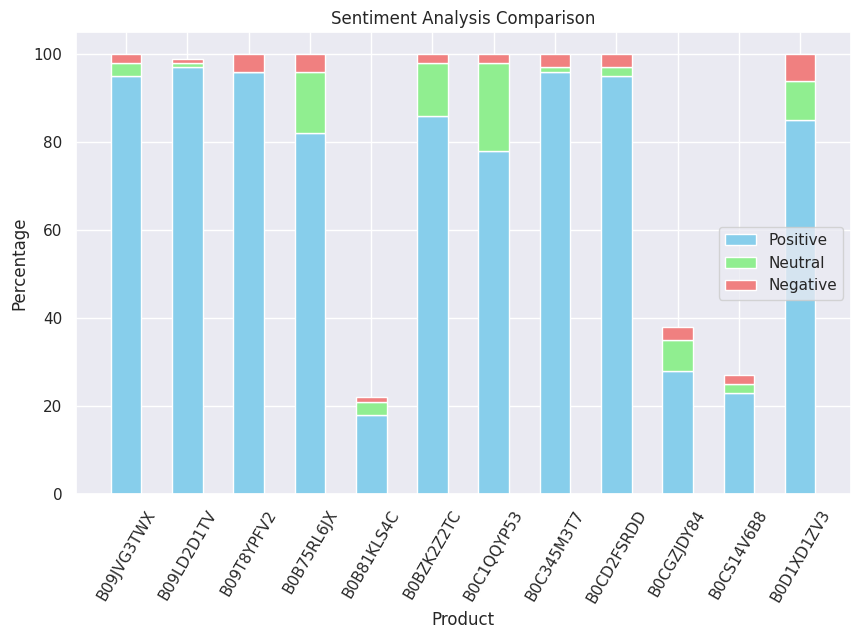

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Define the positions and width for the bars
bar_width = 0.5
positions = np.arange(len(product_sentiment_summary['product_id']))

# Plot bars for each sentiment category
p1 = ax.bar(positions, product_sentiment_summary['positive'], bar_width, label='Positive', color='skyblue')
p2 = ax.bar(positions, product_sentiment_summary['neutral'], bar_width, bottom=product_sentiment_summary['positive'], label='Neutral', color='lightgreen')
p3 = ax.bar(positions, product_sentiment_summary['negative'], bar_width, bottom=product_sentiment_summary['positive'] + product_sentiment_summary['neutral'], label='Negative', color='lightcoral')

# Add title and labels
ax.set_title('Sentiment Analysis Comparison')
ax.set_xlabel('Product')
ax.set_ylabel('Percentage')
ax.set_xticks(positions)
ax.set_xticklabels(product_sentiment_summary['product_id'], rotation=60)
ax.legend()

# Show plot
plt.show()

The bar plot compares the sentiment analysis results for various products, including Beats Studio Buds+ and its competitors. The sentiment categories are Positive (blue), Neutral (green), and Negative (red).


1.	Differences:

* Highest Positive Sentiment: Sony WF-1000XM5 has the highest percentage of positive reviews, indicating superior customer satisfaction compared to other products.
* Lowest Negative Sentiment: Both Bose QuietComfort Ultra and Sony WF-1000XM5 have the lowest negative sentiment, suggesting fewer issues reported by users.

2.	Similarities:

* Low Negative Sentiment Across Products: Most well performing products including Beats, have a very low and pretty much the same amount of negative reveiws as each other. This Proves that a handful of negative reviews are almost unavoidable amongst any product.
* Moderate Neutral Sentiment: Most products have a similar level of neutral sentiment, reflecting mixed or average reviews.


### 8.3 SWOT Analysis:

**Strengths:**

  1. Sound Quality: There has been a positive feedback on clear audio, good bass, and balanced sound signature.
  2. Noise Cancellation: Beats is noted for its effective noise cancellation, with many users appreciating its performance in various environmnets.
  3. Design and Aesthetics: The transparent design of the earbuds and case receives positive attention for being aesthetically pleasing.
  4. Brand Recognition: Strong brand recognition and association with high-quality audio products is a appealing feature for the customers.


**Weaknesses:**

  1. Microphone Issues: Many users have reported problems with microphone clarity during phone calls, affecting communication.
  2. Connection Issues: There has been many reported cases of occasional connectivity problems, including unexpected disconnections.
  3. Fit and Comfort: Many users with smaller ear sizes have reported a comfort issue with either pain or the earphone falling out.
  4. Lack of Features: Absence of Wireless charging, customizable EQ settings, in-ear detection are all noted to be available in competitor products and not in Beats Studio+ Buds.


**Opportunities:**

  1. Feature Introduction/Enhancements: Improving battery, introduction to wireless charging, fixing connection issues and microphone issues can bring about a considerable improvement in customer feedback about Beats.
  2. Market Expansion: Leveraging Brand Recognition to expand into new markets or demographics, focusing on both premium and mid-range segments.
  3. Marketing: Highlighting strengths such as sound quality and design in marketing campaigns to attract new customers.


**Threats:**

  1. Intense Competitors: Competitors like Bose, Sony, Sennheiser and Apple consistenly receive high ratings and positive feedback, posing a threat to market share.
  2. Rapid Tech Advancements: There is a potential threat that the pace of technological advancements can render some of the current features to be outdated.
  3. Price Sensitivity: Though this is a difficult topic to be commented on, there is a very slight threat that customers may start preferring cheaper alternatives if the weaknesses of the Beats product are not addressed in due time.

## 9. Strategic Recommendations

### 9.1 Product Improvements:

1. Innovate New and Enhance Old Features: Shifting focus onto adding and improving features based on user feedback is a must to stay competitive.
2. Marketing and Positioning: Leveraging Brand Recognition and Positive aspects of the product, Using the brand image to pull through some eye-catching brand deals and celebrity ad campaigns can be focused on.
3. Focus on Customer Experience: For a brand like Beats, that positions itself as a premium audio product manufacturer, customer experience must be its prime focus. Addressing key pain points to enhance customer support and ensuring a smooth user experience.
4. Exploring New Markets: Expanding market reach by targeting new age demographics with specific alterations to the product.

### 9.2 Marketing Strategies:

1. Leverage Influencer and Celebrity Partnership: Striking a partnership with tech reviewers, social media influencers and class A celebrities to create authentic endorsements and engaging ads.
2. Engagement with user-generated content: Encouraging and organising hastag campaigns and contests in social media.
3. Public forum for responses and queries: Creating a public forum where the gap between the brand and the end user is bridged. Providing responses to customer issues directly and publicly.
4. Promotions, Loyalty Programs, Brand Deals: Introducing limited-time promotions, Early access to new products, bundle deals and discounts with a priority to repeat-customers.

### 9.3 Future Research:

The areas for future research and data gathering can be as follows:

1. Usage Patterns and Scenarios: Data that reveals how and when the customers utilise their products(eg. studying, commute), helps to identify common usage scenarios and optimise features for these contexts.
2. Feature Specific Data: Which particular feature of the product gets utilised the most can be collected to drive development efforts on the most valued features and improve underutilised ones.
3. Market Trends and Innovations: Gathering data on Industry trends and emerging technologies can provide a head start for any brand to channel their focus onto.
4. Detailed User Demographics: Collecting Detailed User data such as Age, Gender, Location etc would help understand different user segments and tailor marketing strategies to target demographics more effectively.

## 10. Conclusion:

Through the course of this project we get to understand that though the Beats By Dr.Dre Product leans more onto the positive side of the customer voice and choice, there is still a lot left to be desired in terms of improvement of the product and establishing the brand that is Beats as a premium front runner in the field of audio products.

Overall, the project provided valuable insights into consumer sentiment for Beats Studio Buds+, highlighting strengths to emphasize in marketing and areas for product enhancement. Addressing key pain points and adding desired features can help Beats by Dre enhance customer satisfaction and stay competitive in the market.

## 11. References:

Amazon: https://www.amazon.com/

OxyLabs: https://oxylabs.io/

Beats By Dr. Dre: https://www.beatsbydre.com/

Seaborn: https://seaborn.pydata.org/

